# Soil Fertility
Use elemetal soil analysis to determine the fertility of the soil.

**Input**
* N - ratio of Nitrogen (NH4+) content in soil
* P - ratio of Phosphorous (P) content in soil
* K - ratio of Potassium (K) content in soil
* ph - soil acidity (pH)
* ec - electrical conductivity
* oc - organic carbon
* S - sulfur (S)
* zn - Zinc (Zn)
* fe - Iron (Fe)
* cu - Copper (Cu)
* Mn - Manganese (Mn)
* B - Boron (B)

**Output**
* Class fertility (0 "Less Fertile", 1 "Fertile", 2 "Highly Fertile")


# Import Liberaries and Modules

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree, ensemble
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Get the data



In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/soil-fertility-dataset/dataset1.csv


In [18]:
rawData = pd.read_csv('/kaggle/input/soil-fertility-dataset/dataset1.csv')
rawData.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


# Data Exploration

In [19]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       880 non-null    int64  
 1   P       880 non-null    float64
 2   K       880 non-null    int64  
 3   pH      880 non-null    float64
 4   EC      880 non-null    float64
 5   OC      880 non-null    float64
 6   S       880 non-null    float64
 7   Zn      880 non-null    float64
 8   Fe      880 non-null    float64
 9   Cu      880 non-null    float64
 10  Mn      880 non-null    float64
 11  B       880 non-null    float64
 12  Output  880 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 89.5 KB


No null values

In [20]:
rawData.describe()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
count,880.00000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,246.73750,14.562159,499.978409,7.510500,0.543659,0.617989,7.545080,0.469273,4.140523,0.952443,8.666500,0.590159,0.588636
std,77.38886,21.967755,124.222838,0.464912,0.141597,0.842986,4.424184,1.894234,3.110011,0.465900,4.298828,0.570800,0.575462
min,6.00000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.000000
25%,201.00000,6.800000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.225000,0.270000,0.000000
50%,257.00000,8.100000,475.000000,7.500000,0.545000,0.590000,6.640000,0.360000,3.565000,0.930000,8.345000,0.405000,1.000000
75%,307.00000,10.550000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.472500,0.610000,1.000000
max,383.00000,125.000000,887.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,2.000000


In [21]:
rawData['Output'].value_counts()

1    440
0    401
2     39
Name: Output, dtype: int64

- 0 describes low-fertility
- 1 describes medium-fertility
- 2 describes high-fertility

In [22]:
rawDataCopy = rawData.copy()
rawDataCopy.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


Correlation is a statical technique to show the relation between variables and if they depend on each other.

In [23]:
corr = rawDataCopy.corr()

<AxesSubplot:>

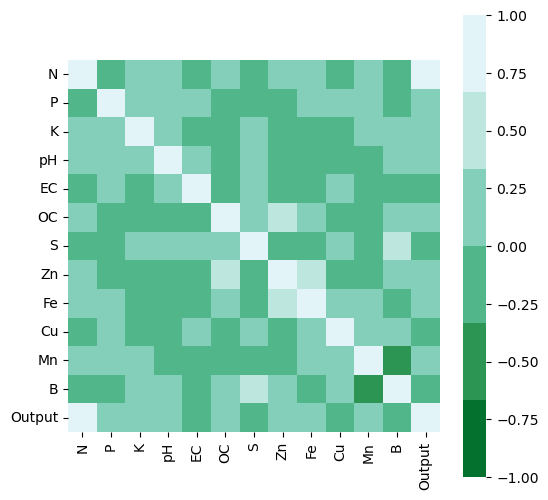

In [24]:
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr,
    cmap=sns.color_palette("BuGn_r"),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

Divide data into X (features) and y (labels/targets).

In [25]:
labels = rawDataCopy[['Output']]
features = rawDataCopy[['N', 'P', 'K', 'pH', 'EC']]

In [26]:
features.head()

,N,P,K,pH,EC
0,138,8.6,560,7.46,0.62
1,213,7.5,338,7.62,0.75
2,163,9.6,718,7.59,0.51
3,157,6.8,475,7.64,0.58
4,270,9.9,444,7.63,0.40


In [27]:
labels.head()

,Output
0,0
1,0
2,0
3,0
4,1


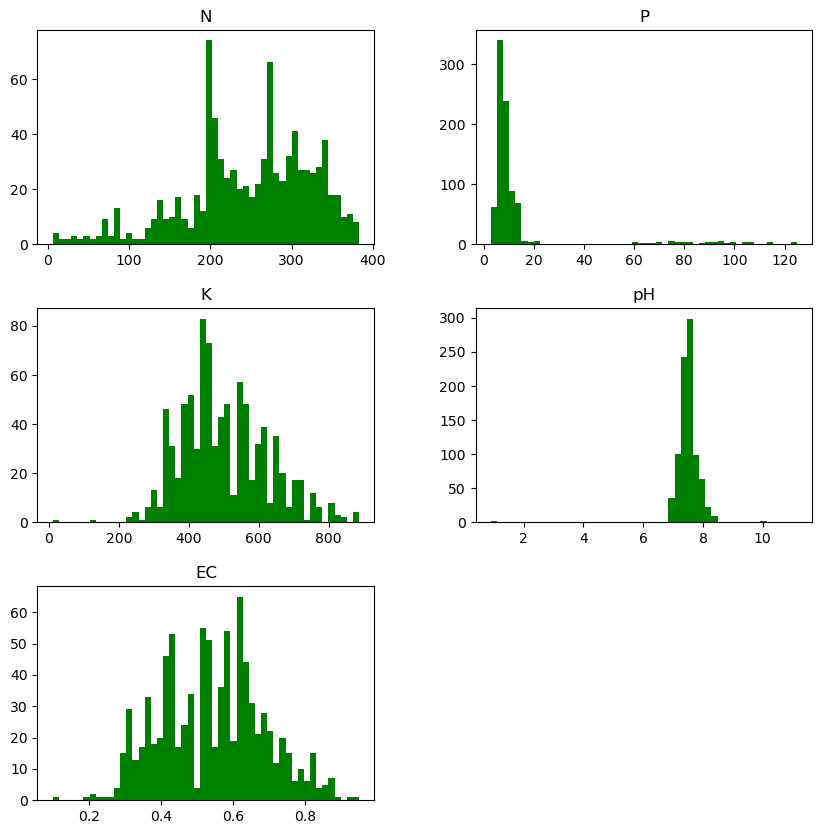

In [28]:
features.hist(bins=50, figsize=(10, 10), color ='green', grid=False)
plt.show()

# Prepare the Data for Machine Learning Algorithms

### Feature Scaling

We use Log Transform to convert skewed distibution to a normal distribution

In [29]:
transformedFeatures = features.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

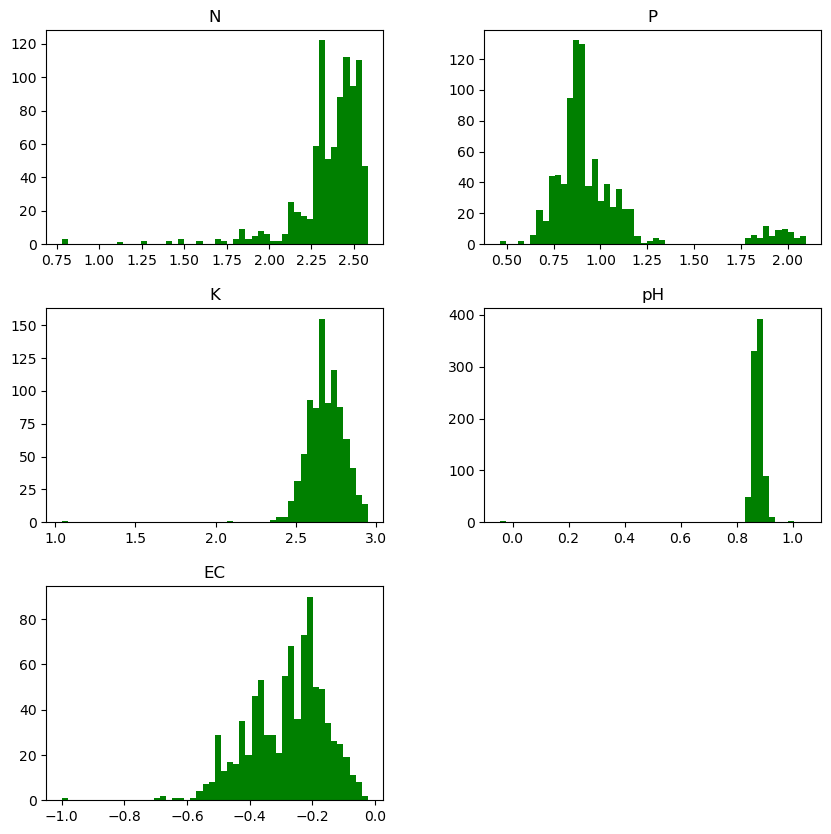

In [30]:
transformedFeatures.hist(bins=50, figsize=(10, 10), color='green', grid=False)
plt.show()

#Choose a Model

### Splitting data into train and val

In [31]:
from sklearn.model_selection import train_test_split

trainInput, validationInput, trainTarget, validationTarget = train_test_split(transformedFeatures, labels, test_size = 0.2, shuffle=True, random_state = 42)
print("Train Data Shape: ", trainInput.shape)

Train Data Shape:  (704, 5)


In [32]:
trainTarget = trainTarget.values.ravel()

In [33]:
svcClf = SVC()
svcClf.fit(trainInput, trainTarget)

SVC()

In [34]:
forestClf = ensemble.RandomForestClassifier()
forestClf.fit(trainInput, trainTarget)

RandomForestClassifier()

In [35]:
nbClf = GaussianNB()
nbClf.fit(trainInput, trainTarget)

GaussianNB()

In [36]:
knnClf = KNeighborsClassifier()
knnClf.fit(trainInput, trainTarget)

KNeighborsClassifier()

In [37]:
treeClf = tree.DecisionTreeClassifier()
treeClf.fit(trainInput, trainTarget)

DecisionTreeClassifier()

SVC  accuarcy is  0.8352272727272727
RandomForestClassifier  accuarcy is  0.8920454545454546
GaussianNB  accuarcy is  0.6022727272727273
KNeighborsClassifier  accuarcy is  0.8409090909090909
DecisionTreeClassifier  accuarcy is  0.8579545454545454


<AxesSubplot:>

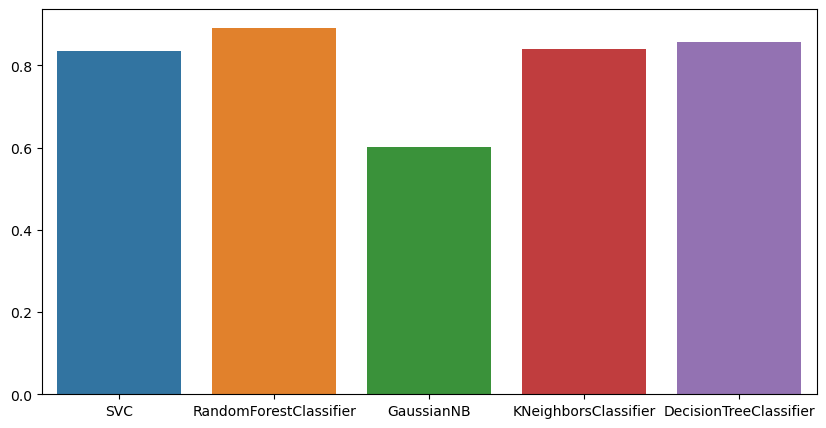

In [38]:
models = [svcClf, forestClf, nbClf, knnClf, treeClf]
accs = []
titles = []

for model in models:
    pred = model.predict((validationInput))
    model_acc = accuracy_score(validationTarget, pred)
    accs.append(model_acc)
    titles.append(type(model).__name__)
    print(type(model).__name__, " accuarcy is ", model_acc)

fig = plt.figure(figsize=(10, 5))
sns.barplot(x = titles, y=accs)

### Pros & Cons
**SVC**
1. clear margin of separation between classes
2. more effective in high dimensional spaces
3. effective in cases where the number of dimensions is greater than the number of samples
4. memory efficient                                                                                                          
5. not suitable for large data sets                                                                                          

**Random Forest Classifier**
1. quite fast
2. able to deal with unbalanced and missing data
3. may over-fit data sets that are particularly noisy
4. data-hungry

**GaussianNB**
1. very fast 
2. better than other models with less training data if the assumption of independence of features holds
3. If you have categorical input variables, the Naive Bayes algorithm performs exceptionally well in comparison to numerical variables
4. effectively works in Multi-class predictions.

**KNeighborsClassifier**
1. robust to noisy data
2. effective if the training data is large

**DecisionTreeClassifier**
1. does not require normalization of data
2. does not require scaling of data as well
3. higher time to train the model

# Fine Tuning RandomForest 

In [39]:
forestClassifier = ensemble.RandomForestClassifier(random_state=42)

In [40]:
paramGrid = { 
    'n_estimators': [200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6 ,7 ,8, 9, 10],
    'criterion' :['gini', 'entropy']
}

In [41]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(estimator=forestClassifier, param_grid=paramGrid, cv= 5)
clf.fit(trainInput, trainTarget)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 500]})

In [42]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 500}

# Fit the Model

In [43]:
randomForestModel = ensemble.RandomForestClassifier(criterion = 'gini',
 max_depth = 10,
 max_features = 'auto',
 n_estimators = 300, random_state=42)

In [44]:
randomForestModel.fit(trainInput, trainTarget)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [45]:
predictions = randomForestModel.predict(validationInput)

In [46]:
# import warnings
# warnings.filterwarnings('always') 
# warnings.filterwarnings('ignore')

In [47]:
report = classification_report(validationTarget, predictions)
report

'              precision    recall  f1-score   support\n\n           0       0.88      0.97      0.93        78\n           1       0.90      0.89      0.89        88\n           2       1.00      0.30      0.46        10\n\n    accuracy                           0.89       176\n   macro avg       0.93      0.72      0.76       176\nweighted avg       0.90      0.89      0.88       176\n'

In [48]:
mode_acc = accuracy_score(validationTarget, predictions)
mode_acc

0.8920454545454546

### Save model as pkl

In [49]:
import pickle

with open('random_forest_pkl.pkl', 'wb') as file:
    pickle.dump(model, file)

In [50]:
pip install skl2onnx onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 6.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.5/298.5 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 932.4 kB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [52]:
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# --- Setup for conversion (Assuming your model is trained) ---
# NOTE: The provided code snippet only *initializes* the model, 
#       it doesn't show the training step (model.fit(features, labels)).
#       You must train the model BEFORE saving it.

# Dummy example of a trained model and features (Replace with your actual data/model)
# Assuming 'randomForestModel' is your trained model object
randomForestModel.fit(features, labels.values.ravel()) # Train the model

# 1. Define the input shape/type
# ONNX requires knowing the shape and type of the input data.
# The second argument is the shape: [None, N_FEATURES]
# 'None' means the batch size can vary.
# 'features.shape[1]' is the number of input features (N, P, K, pH, EC in your case).
initial_type = [('float_input', FloatTensorType([None, features.shape[1]]))]

# 2. Convert the Scikit-learn model to ONNX format
onx = convert_sklearn(
    randomForestModel, 
    initial_types=initial_type, 
    target_opset=13  # A common and stable ONNX Opset version
)

# 3. Save the ONNX model to a file
with open("random_forest_model.onnx", "wb") as f:
    f.write(onx.SerializeToString())

print("Successfully converted and saved the model to random_forest_model.onnx")

Successfully converted and saved the model to random_forest_model.onnx


### Load model

In [51]:
with open('random_forest_pkl.pkl', 'rb') as file:
    model = pickle.load(file)